In [1]:
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
t  = np.linspace(0,2*np.pi,100)
ft = np.sin(t)

In [17]:
def pseudo_inv (X:np.array,Y:np.array)->np.array:
    pinv = np.dot( X.T,X )
    pinv = np.linalg.inv(pinv)
    pinv = np.dot( pinv,X.T )
    pinv = np.dot( pinv,Y   )
    
    return pinv

In [66]:
def plot_di(X,Y,L):
    plt.figure( figsize=(10,5) )
    plt.plot(X,Y,'o',markersize=20)
    plt.plot(X,L,color='orange',linewidth=3)
    
    for i,j,k in zip(X,Y,L):
        plt.arrow(i,k,0,j-k,color='black')

    plt.grid(True)

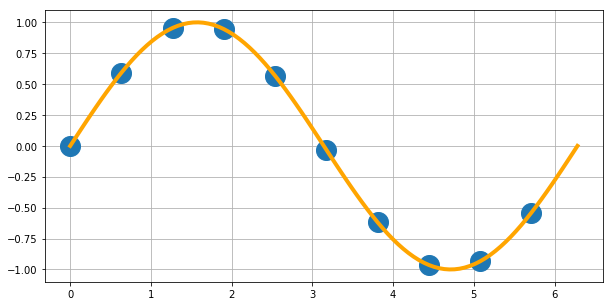

In [3]:
plt.figure( figsize=(10,5) )
plt.plot(t[::10],ft[::10],'o',markersize=20)
plt.plot(t      ,ft      ,color='orange',linewidth=4)

plt.grid(True)

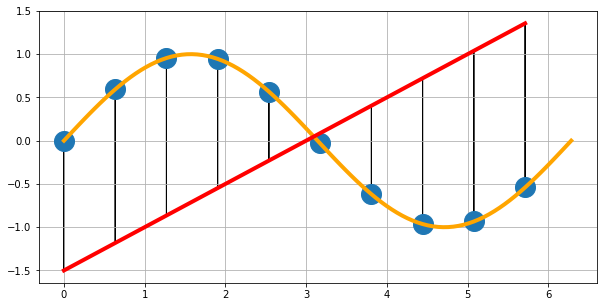

In [4]:
plt.figure( figsize=(10,5) )
plt.plot(t[::10],ft[::10],'o',markersize=20)
plt.plot(t      ,ft             ,color='orange',linewidth=4)
plt.plot(t[::10],0.5*t[::10]-1.5,color='red'   ,linewidth=4)

for i,j,k in zip(t[::10],ft[::10],0.5*t[::10]-1.5):
    plt.arrow(i,k,0,j-k,color='black')

plt.grid(True)

In [45]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w = pseudo_inv(  np.concatenate( (X_Train,Ones),axis=-1 ),Y_Train  )

In [58]:
X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test,Ones),axis=-1 ),w  )

(15, 1)

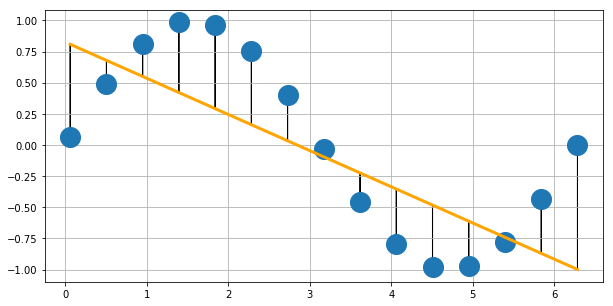

In [67]:
plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

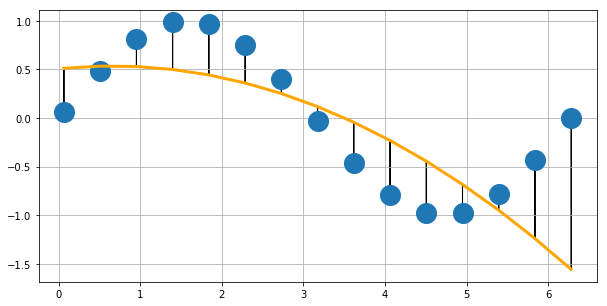

In [71]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w2 = pseudo_inv(  np.concatenate( (X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**2,X_Test,Ones),axis=-1 ),w2  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

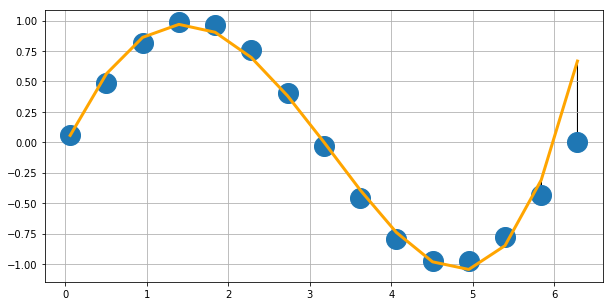

In [72]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w3 = pseudo_inv(  np.concatenate( (X_Train**4,X_Train**3,X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**4,X_Test**3,X_Test**2,X_Test,Ones),axis=-1 ),w3  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

In [80]:
print('{}\n\n{}\n\n{}'.format( str(w),str(w2),str(w3) ) )

[[-0.29065334]
 [ 0.82723932]]

[[-0.0661961 ]
 [ 0.08745787]
 [ 0.50727395]]

[[ 0.00767214]
 [ 0.00465356]
 [-0.54489567]
 [ 1.44834226]
 [-0.03356611]]


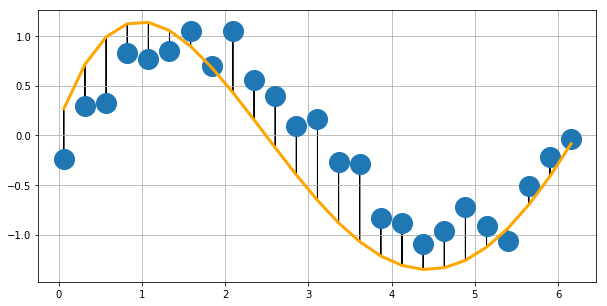

In [102]:
X_Train  = t [::10][:,np.newaxis]
Y_Train  = ft[::10]
Y_Train += np.random.normal(0,.3,Y_Train.shape[0])
Y_Train  = Y_Train[:,np.newaxis]
Ones     = np.ones( X_Train.shape[0] )[:,np.newaxis]

w3 = pseudo_inv(  np.concatenate( (X_Train**4,X_Train**3,X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test  = t [1::4][:,np.newaxis]
Y_Test  = ft[1::4]
Y_Test += np.random.normal(0,.1,Y_Test.shape[0])
Y_Test  = Y_Test[:,np.newaxis]
Ones    = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**4,X_Test**3,X_Test**2,X_Test,Ones),axis=-1 ),w3  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

In [101]:
print('{}'.format( str(w3) ) )

[[-0.00469098]
 [ 0.15855524]
 [-1.07423308]
 [ 1.77880313]
 [ 0.03043507]]
